Цель работы: 1) измерение давления насыщенного пара жидкости при разной температуре; 2) вычисление по полученным данным теплоты испарения с помощью уравнения Клапейрона-Клаузиуса.

В работе используются: термостат, герметический сосуд, заполненный водой, отсчётный микроскоп.


Теоретическая часть
Уравнение Клапейрона-Клаузиуса
Если считать что насыщенные пары подчиняются закона Менделеева-Клапейрона, и пренебречь удельным объемом жидкости относительно удельного объема паров то из уравнения Клапейрона-Клаузиуса получаем формулу для удельной теплоты испарения


$$L = \frac{RT^2}{\mu P}\frac{dP}{dT} = - \frac{R}{\mu} \frac{d(ln P)}{d(1/T)}$$
  
Как видим, если измерить зависимость давления насыщенных паров от температуры по формуле можно получить удельную теплоту испарения.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
from labs import *
from statistics import stdev

In [25]:
sigmah=0.1
sigmaT=0.01
g=9.8154
po=13521.2

In [26]:
nag=pd.read_csv('Нагрев.csv')
nag['dh']=abs(nag['h2']-nag['h1'])
nag['sigmadh']=sigmah*np.sqrt(2)
nag['P']=po*g*nag['dh']*0.001
nag['relh']=nag['sigmadh']/nag['dh']
nag['sigmaP']=nag['P']*nag['relh']
nag['lnP']=np.log(nag['P'])
nag['sigmalnP']=nag['sigmaP']/nag['P']
nag['T']=273+nag['T']
nag['1T']=1/nag['T']
nag['sigma1T']=nag['1T']*(sigmaT/nag['T'])
nag

,T,h1,h2,dh,sigmadh,P,relh,sigmaP,lnP,sigmalnP,1T,sigma1T
0,293.58,1.00,-17.90,18.90,0.141421,2508.332144,0.007483,18.768875,7.827373,0.007483,0.003406,1.160238e-07
1,294.06,1.03,-18.46,19.49,0.141421,2586.634576,0.007256,18.768875,7.858113,0.007256,0.003401,1.156453e-07
2,295.21,1.04,21.75,20.71,0.141421,2748.548080,0.006829,18.768875,7.918828,0.006829,0.003387,1.147461e-07
3,296.16,1.04,23.80,22.76,0.141421,3020.615852,0.006214,18.768875,8.013216,0.006214,0.003377,1.140111e-07
4,297.17,1.05,24.53,23.48,0.141421,3116.171363,0.006023,18.768875,8.044360,0.006023,0.003365,1.132374e-07
5,298.17,1.05,26.49,25.44,0.141421,3376.294696,0.005559,18.768875,8.124534,0.005559,0.003354,1.124792e-07
6,299.17,1.05,27.20,26.15,0.141421,3470.523046,0.005408,18.768875,8.152061,0.005408,0.003343,1.117285e-07
7,300.18,1.05,29.38,28.33,0.141421,3759.843897,0.004992,18.768875,8.232133,0.004992,0.003331,1.109779e-07
8,301.16,1.05,31.75,30.70,0.141421,4074.380785,0.004607,18.768875,8.312474,0.004607,0.003320,1.102568e-07
9,302.17,1.05,32.98,31.93,0.141421,4237.621448,0.004429,18.768875,8.351757,0.004429,0.003309,1.095210e-07


In [27]:
ohl=pd.read_csv('Охлаждение.csv')
ohl['dh']=abs(ohl['h2']-ohl['h1'])
ohl['sigmadh']=sigmah*np.sqrt(2)
ohl['P']=po*g*ohl['dh']*0.001
ohl['relh']=ohl['sigmadh']/ohl['dh']
ohl['sigmaP']=ohl['P']*ohl['relh']
ohl['lnP']=np.log(ohl['P'])
ohl['sigmalnP']=ohl['sigmaP']/ohl['P']
ohl['T']=273+ohl['T']
ohl['1T']=1/ohl['T']
ohl['sigma1T']=ohl['1T']*(sigmaT/ohl['T'])
ohl

,T,h1,h2,dh,sigmadh,P,relh,sigmaP,lnP,sigmalnP,1T,sigma1T
0,311.96,1.05,56.16,55.11,0.141421,7313.978015,0.002566,18.768875,8.897543,0.002566,0.003206,1.027548e-07
1,311.01,1.05,53.39,52.34,0.141421,6946.354732,0.002702,18.768875,8.845972,0.002702,0.003215,1.033835e-07
2,309.96,1.05,50.90,49.85,0.141421,6615.891926,0.002837,18.768875,8.797230,0.002837,0.003226,1.040851e-07
3,309.00,1.05,48.53,47.48,0.141421,6301.355038,0.002979,18.768875,8.748520,0.002979,0.003236,1.047329e-07
4,308.00,1.05,45.82,44.77,0.141421,5941.694715,0.003159,18.768875,8.689750,0.003159,0.003247,1.054141e-07
5,307.01,1.05,43.09,42.04,0.141421,5579.380072,0.003364,18.768875,8.626833,0.003364,0.003257,1.060950e-07
6,306.01,1.05,41.42,40.37,0.141421,5357.744374,0.003503,18.768875,8.586298,0.003503,0.003268,1.067896e-07
7,305.02,1.05,39.30,38.25,0.141421,5076.386483,0.003697,18.768875,8.532355,0.003697,0.003278,1.074839e-07
8,304.04,1.05,37.19,36.14,0.141421,4796.355751,0.003913,18.768875,8.475612,0.003913,0.003289,1.081779e-07
9,303.01,1.05,36.17,35.12,0.141421,4660.985445,0.004027,18.768875,8.446982,0.004027,0.003300,1.089146e-07


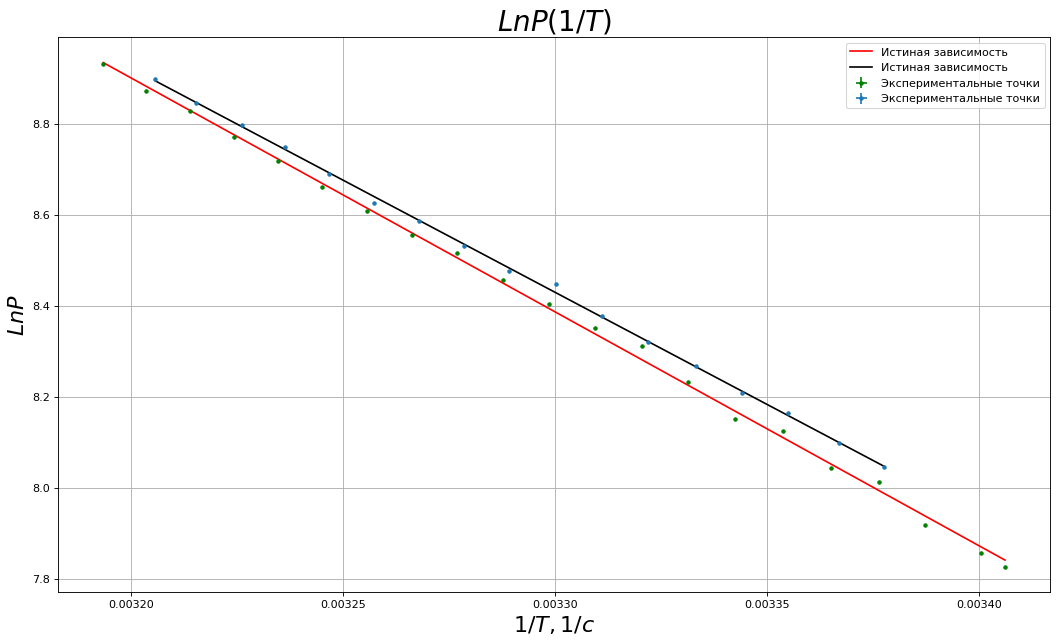

In [28]:
k1, b1 = curve_fit(line, nag['1T'], nag['lnP'])
k2, b2 = curve_fit(line, ohl['1T'], ohl['lnP'])
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=nag['1T'], xerr=nag['1T'].agg(get_err), y=nag['lnP'], yerr=nag['lnP'].agg(get_err), fmt='.', label='Экспериментальные точки', color="green")
plt.plot(nag['1T'].agg(get_var), line(nag['1T'].agg(get_var), k1, b1), label="Истиная зависимость", color="red")
plt.errorbar(x=ohl['1T'], xerr=ohl['1T'].agg(get_err), y=ohl['lnP'], yerr=ohl['lnP'].agg(get_err), fmt='.', label='Экспериментальные точки')
plt.plot(ohl['1T'].agg(get_var), line(ohl['1T'].agg(get_var), k2, b2), label="Истиная зависимость", color="black")
plt.title(r"$LnP(1/T)$", fontsize=25)
plt.xlabel(r"$ 1/T, 1/c$", fontsize=20)
plt.ylabel(r"$LnP$", fontsize=20)
plt.grid(True)
plt.legend() 